### IFT6135 Assignment 1

Dataset: MNIST handwritten digit dataset

Objective: Build a Neural Network from scratch, without a deep learning library such as TensorFlow.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset 
#def loaddata(datapath=""):
train_data = np.loadtxt("mnist_train.csv", delimiter=",")
test_data = np.loadtxt("mnist_test.csv", delimiter=",")
 #   return (train_data, test_data)


In [ ]:
# Setup variables
NumLabels=10
ImageSize=28
#NumFeatures=

In [2]:
print(train_data.shape)

(60000, 785)


In [3]:
print(test_data.shape)

(10000, 785)


In [ ]:
#train_data[0]

### Normalize and transform the data 

In [4]:
# Map the values of the image data into interval [0.01, 0.99]

fac = 255  *0.99 + 0.01
train_images = np.asfarray(train_data[:, 1:]) / fac
test_images = np.asfarray(test_data[:, 1:]) / fac
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [33]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [32]:
# # Transform the labels to onehot

# lr = np.arrange(NumLabels)
# train_labels_onehot=(lr==train_labels).astype(np.float)
# test_labels_onehot=(lr==test_labels).astype(np.float)
# # we don't want zeroes and ones in the labels neither:
# train_labels_onehot[train_labels_onehot==0] = 0.01
# train_labels_onehot[train_labels_onehot==1] = 0.99
# test_labels_onehot[test_labels_onehot==0] = 0.01
# test_labels_onehot[test_labels_onehot==1] = 0.99

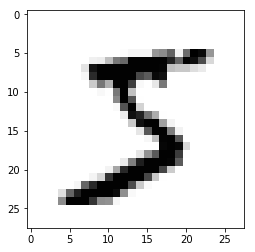

In [6]:
# look at one image
img = train_images[0].reshape((28,28))
plt.imshow(img, cmap="Greys")
plt.show()

# # look at all the images
# for i in range(NumLabels):
#     img = train_imgs[i].reshape((28,28))
#     plt.imshow(img, cmap="Greys")
#     plt.show()

### Build and train a neural network

1. Design the Architecture
    - 2 hidden layers
    - output layer use softmax of 10 classes
    - total num of parameters, incld bias, falls within range of [0.5M, 1.0M]
    
2. Compile the model
    - select optimizer, loss function, metrics
    - loss function: cross entropy - minimize to optimize the model parameters using stochastic gradient descent
    
3. Train the model 
    - train_images and train_labels
    - epochs: 10 
    - validation split

4. Evaluate model
    - on test_images and test_labels

5. Predict 
    - on test_images

In [13]:
# Example of a class and definitions
class myclass:
    def __init__(self, x):
        self.x=x
    
    def myfunc(self):
        print("hello function "+ str(self.x))

In [14]:
# outside the class myclass
def func2(y):
    #print(self.x)
    return 2*y

In [18]:
# initialize p1 as class
p1=myclass(5)
print(p1.x)
p1.myfunc()

# does not belong to class:
func2(3)



5
hello function 5


6

In [75]:

class NN(object):
    
    def __init__(self,hidden_dims=(1024,2048),n_hidden=2,mode='train',data=None,model_path=None):
        self.hidden_dims=hidden_dims # hidden dimensions, default = (1024,2048)
        self.n_hidden=n_hidden # hidden number of layers 
        self.mode=mode # train or predict
        self.data=data # dataset, not 'data_path'
        self.model_path=model_path # TODO: what is a model_path? 
        
    # DEFINE NETWORK ARCHITECTURE
        # num nodes in input layer - 28x28=784
        nodes_input=np.dot(self.hidden_dims[0], self.hidden_dims[1])
        nodes_hidden=500 # TODO: implement get_nodes_hidden(lower,upper, h1,h2)
        nodes_output=10 # TODO
        print("number of input nodes: "+ str(nodes_input))
        
    # INITIALIZE THE PARAMETERS
        self.params = self.initialize_params(nodes_input,nodes_hidden, nodes_output )
        print("The W3 matrix shape is: " + str(self.params["W3"].shape))
        print("The b3 vector shape is: " + str(self.params["b3"].shape))
        
    #if mode == 'train':
        # train the model
    #elif mode == 'test': 
        # predict 
    
########################################   
# Initialize the weight parameters, with one of 3 modes:
# 'Zero' - all weights are zero
# 'Normal' - sample from standard Normal distribution 
# 'Glorot' - sample from uniform distribution
# returns weight matrix
# TODO: manually encode, then loop through hidden layers 
########################################    
   # def initialize_weights(self, n_hidden, dims, mode='zero'):
    def initialize_params(self, nodes_input, nodes_hidden,nodes_output, mode='zero'):
        if mode == 'zero':
            print("initializing weights with zeros")
            W1 = np.zeros((nodes_hidden, nodes_input))
            b1 = np.zeros((nodes_hidden,1))
            W2 = np.zeros((nodes_hidden,nodes_hidden))
            b2 = np.zeros((nodes_hidden,1)) 
            W3 = np.zeros((nodes_output,nodes_hidden))
            b3 = np.zeros((nodes_output,1))
            # create params dictionary              
            params = {"W1": W1, "b1": b1,
                       "W2": W2, "b2": b2,
                       "W3": W3, "b3": b3}
            return params
            #loop through layer 1 and 2
#             for i in range(1, n_hidden):
#                 self.W[i] = np.zeros(dims[0])
        elif mode == 'normal':
            print("initializing weights with Normal distribution")
        elif mode == 'glorot':
             print("initializing weights with Glorot distribution")
########################################
# Activation functions
########################################
    # why do we need this ??
    def activation(self,input):
        return (sigmoid(input))

    def sigmoid(self, x, derivative=False):
        if (derivative == True):
            return x*(1-x)
        return 1/(1+np.exp(-x))

    def relu(self, M):
        print ("Apply Relu activation function")
        return np.where(M >= 0, M, 0)
    
    def softmax(self,x, derivative=False):
        if (derivative==True):
            return 
        return (np.exp(x) / float(sum(np.exp(x))))


########################################  
# Forward propagation on initialized params,
# input - training/testing images
# labels - training/testing labels TODO: why do we need labels??
# then, during prediction/testing step on optimizised params
# returns activations
########################################  
    def forward(self,input, labels, params):
        print("forward prop")
        print("input shape is: " + str(input.shape))
        Z1 = np.dot(params["W1"], input) + params["b1"]
        print("Z1 shape is: " + str(Z1.shape)) #(500, 60000)
        A1 = self.relu(Z1)
        print("A1 shape is: " + str(A1.shape))
        Z2 = np.dot(params["W2"], A1) + params["b2"]
        print("Z2 shape is: " + str(Z2.shape))
        A2 = self.relu(Z2)
        print("A2 shape is: " + str(A2.shape))
        Z3 = np.dot(params["W3"], A2) + params["b3"]
        print("Z3 shape is: " + str(Z3.shape))
        A3 = self.softmax(Z3)
        print("A3 shape is: " + str(A3.shape))

        activatations = {"Z1": Z1, "A1": A1,
                         "Z2": Z2, "A2": A2,
                         "Z3": Z3, "A3": A3, 
        }
        return activations
    
    
######################################## 
# Update params with the gradients
# returns optimized params
######################################## 
def update(self, grads, params, learningRate):  
    params["W1"] = params["W1"]-(learningRate*grads["dW1"])
    params["b1"] = params["b1"]-(learningRate*grads["db1"])
    params["W2"] = params["W2"]-(learningRate*grads["dW2"])
    params["b2"] = params["b2"]-(learningRate*grads["db2"])
    params["W3"] = params["W3"]-(learningRate*grads["dW3"])
    params["b3"] = params["b3"]-(learningRate*grads["db3"])
    return params




########################################                
# Train the model
# returns params
########################################  
    def train(self, input, labels, learningRate):
        print("train the model")
        # forward propagation on training set, given the initialized params 
        self.activations = self.forward(input,labels,self.params)
#         error = model.loss(results.A2, y)
#         derivatives = model.backward()
#         params =model.update(learningRate)
    
                

In [76]:
# Define model:
model = NN((28,28), 2, 'train')

learningRate=1.2

#record the average loss measured on the training data at the end 
#of each epoch (10 values for each setup)
model.train(np.transpose(train_images), test_images, learningRate)

#model = NN((28,28),2, 'test', )

num_epochs = 5

# Iterate through the epochs
#     for i in range (0, num_epochs):
#         results = model.forward(x,y,params)
#         error = model.loss(results.A2, y)
#         derivatives = model.backward()
#         params =model.update()
   
# Predict
#predictions = NN.test()

number of input nodes: 784
initializing weights with zeros
The W3 matrix shape is: (10, 500)
The b3 vector shape is: (10, 1)
train the model
forward prop
input shape is: (784, 60000)
Z1 shape is: (500, 60000)
Apply Relu activation function
A1 shape is: (500, 60000)
Z2 shape is: (500, 60000)
Apply Relu activation function
A2 shape is: (500, 60000)
Z3 shape is: (10, 60000)


TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
######################################## 
# Calculate error - cross entropy:
# this error is minimized to optimize the model parameters using stochastic gradient descent
# compare last result of prediction vs actual labels 
# prediction is the output from the last layer (num_input x num_classes)
# actual is the labels (num_examples x 1), not a one-hot encoded vector
# formula: sum(-log()) / m
######################################## 
def loss(self, prediction, actual):
    m = actual.shape[0]
    print(m)
    p = prediction # A3 -output of softmax act 
    # use array indexing to get softmax probability of the correct label for each sample
    log_likelihood = -np.log(p[range(m),actual])
    loss = -np.sum(log_likelihood)/m
    return loss
    



In [ ]:
# returns derivatives 
def backward(self,params, activations, inputs, labels):
    print("backward propagation")
    # get the number of examples
    m = inputs.shape[1]
    print(m)
    
    dZ3 = activations["A3"] - labels
    dW3
    db3
    dz2
    dW2
    db2
    dz1
    dz
    


In [ ]:
def test(self):
    print("test/predict the model")
    predictions = forward(inputs, params)